###Clustering Algorithms

This notebook has some highlights on **Accelerating Computing** with common **Clustering methods** to achieve higher performance in applications that involve massive data processing real time or near real time.  Applications vary from recommended systems, LLMs, forecasting, fraud detection and bioinformatics analysis.  **K-means** is one of the most widely used and particularly effective when dealing with simple, clearly defined clusters. **HDBScan** excels at clustering data with more complex structures or significant noise. HDBScan does not require specifying the number of clusters upfront and it identifies meaningful clusters while ignoring noise. **Gaussian Mixture Models (GMM)** provide probabilistic clustering instead of assigning data points strictly to one cluster,  and it assesses the probabilities to indicate how likely each data point belongs to each cluster. This feature makes it ideal for scenarios where there's overlap between clusters or uncertainty in the data.

###K-means clustering


**K-means** algorithm partitions data into K-clusters based on feature similarity. The **algorithm iteratively refines the cluster** assignments to minimize the cluster variance. It randomly selects the data points as initial sensors and assigns these to the nearest cluster, computes the distances between each data point and all key sensors and assess the data points to the cluster of the nearest sensors. It does more calculations taking the mean of all points assigned to each cluster and it checks if the convergence criteria has been met. **GPU** handles **the distance calculations in parallel** enabling instant computations for massive amount of data points, and computes sums across data points using **parallel reduction algorithm** efficiently - overall reducing the computational overhead and speeding up the convergence.

###HDBSCAN
Hierarchical Dense Based Spatial Clustering Algorithm builds a minimum spanning tree (MST) of distances. First it computes the k-NN graph in which each point connects to its closest neighbors based on the sample parameters, it computes a mutual reachability graph adjusting distances based on local density and it builds the MST. HDBSCAN algorithm creates a hierarchical structure, condenses the hierarchy and extracts the meaningful clusters that also persist over multiple density levels and it returns the list of clusters that are stabilized when no more updates are needed.

The algorithm is GPU-accelerated with cuML library for the k-NN and MST construction, optimized for hierarchical clustering with parallel tree execution and fully parallelized for reduced computation overhead. This leads to GPU-based computations speed up convergence and scalabiity.
The HDBSCAN algorithms handles noise very well.

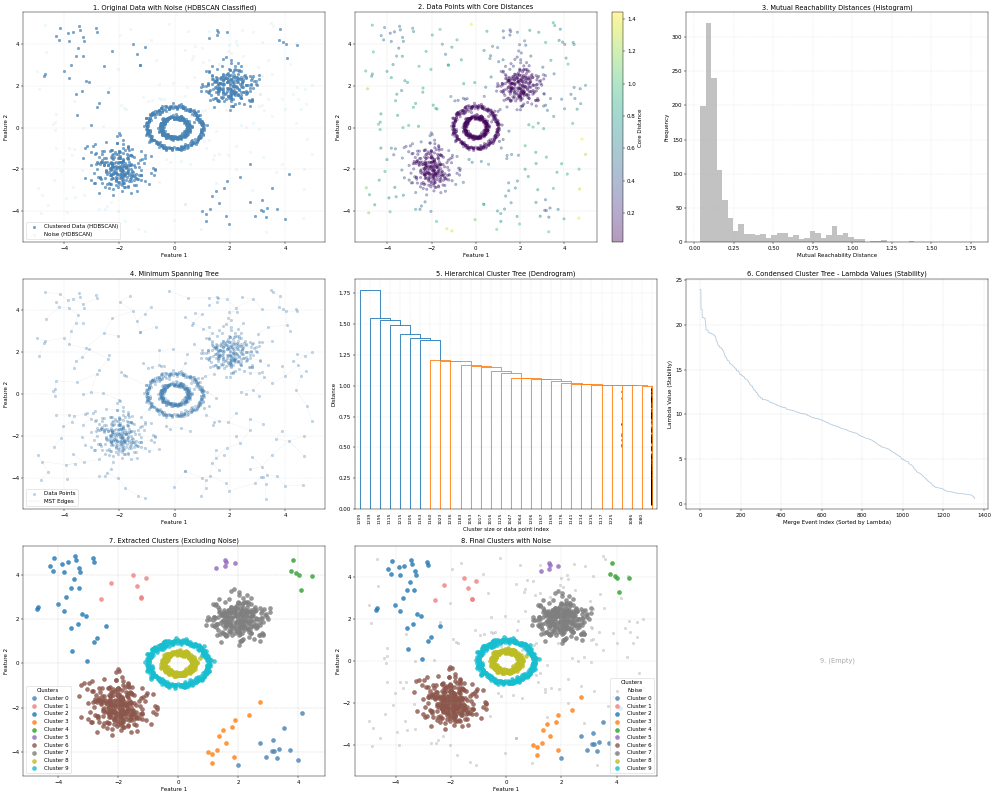

All eight HDBSCAN visualizations combined into a single 3x3 subplot grid.


In [76]:
''' HDBSCAN Algorithm steps

1. Original data with noise 2. Calculation of Core distances 3. Mutual reachability distances 4. Build MST 5. Build Hierarchical Cluster 6. Condense Clusters 7. Extract Clusters 8. Return the Clusters '''

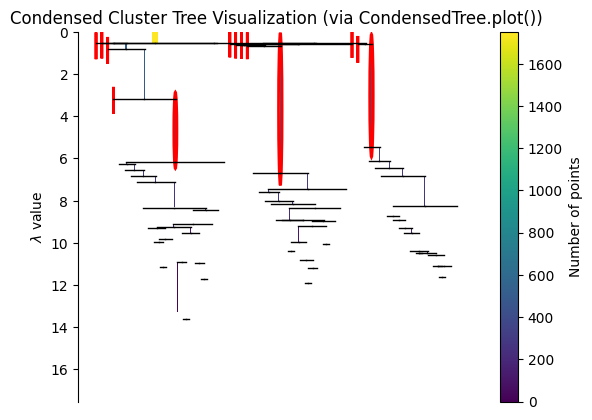

Condensed Cluster Tree visualized using CondensedTree.plot().


In [39]:
''' Condensed Cluster Tree visualized using CondensedTree '''

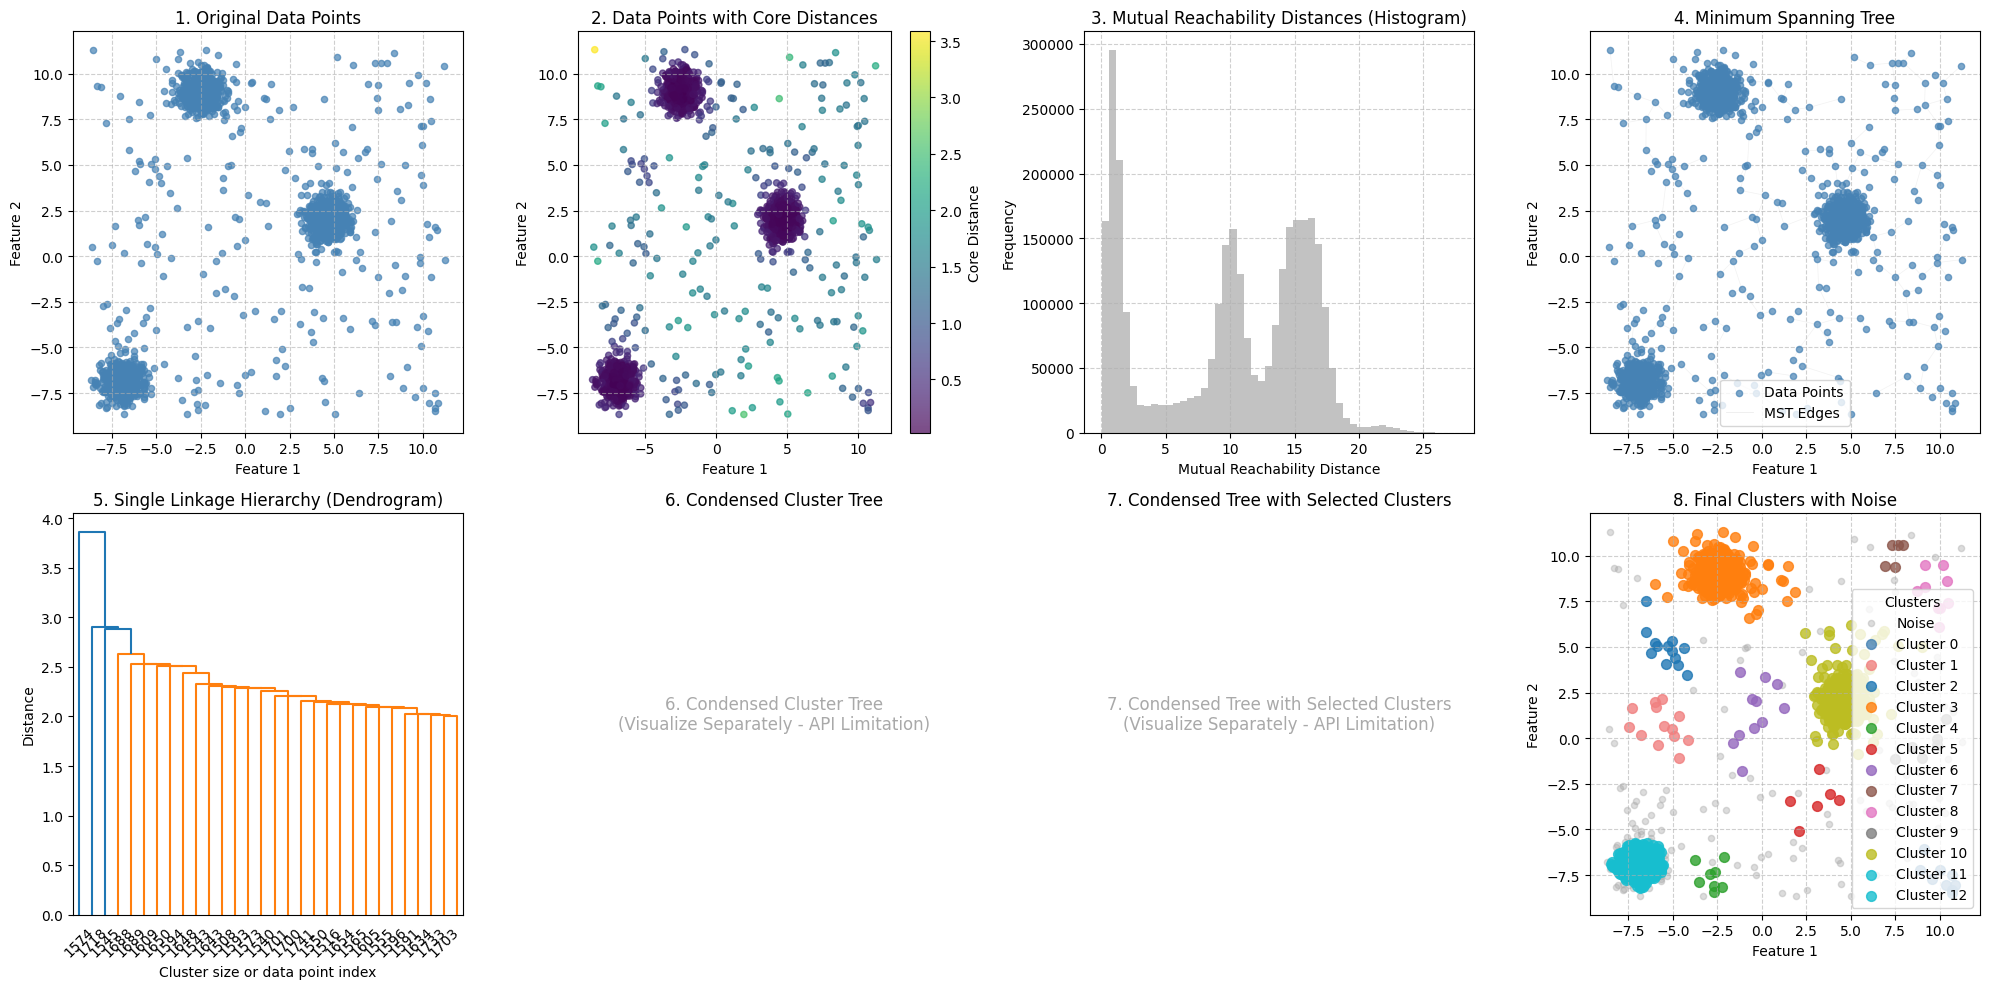

Combined HDBSCAN visualizations displayed.
Note: Due to API limitations, the Condensed Cluster Tree visualizations (steps 6 & 7) could not be directly embedded into subplots and are represented by text placeholders. They are typically visualized using `condensed_tree.plot()` in a separate figure.


In [45]:
''' HDBSCAN Algorithm steps '''

###K-Means vs HDBSCAN

**K-means** significant adavantage is the simplicity and speed. It is computationally efficient and makes a good choice for large datasets. It works well across a wide range of clustering tasks. However it comes with some limitations. K-means requires a pre-defined number of clusters that might not always align with the natural structure of the data. Different starting points may lead to different outcomes. K-means does not handle well outliers and data with noise.

**HDBSCAN** does not require a predefined number of clusters. It is robust to noise and outliers isolating these points instead of forcing them to cluster. HDBSCAN can detect clusters of various density and shape. There are trade-offs with HDBSCAN as is computationally more expensive than K-means especially with large datasets. We can apply optimazation to HDBSCAN.
HDBSCAN has applications in environments where data is noisy and more complex, like in cybersecurity and fraud analytics. HDBSCAN addresses the limitations with K-means offering more flexible density based approach.



###BERTopic

BERTopic is a real world use case for HDBSCAN. It is topic modeling technique that uses transformer based embeddings to identify structure topics in large datasets. Unlike traditional topic modeling techniques like Latent Dirichlet Allocation (LDA) that rely on word frequency distributiuons, it leverages pre-trained language to use document embedding making it more context aware and accurate.

For BERTopic the workflow is with text transformed into embeddings, dimensionality reduction with UMAP, clustering with HDBSCAN and grouping of words.

GPU-accelerated UMAP and HDBSCAN reduces the modeling run time by over 90%.